In [4]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df1 = pd.read_csv("bankchurners.csv")
df2 = pd.read_csv("basic_client_info.csv")
df3 = pd.read_csv("enriched_churn_data.csv")

In [6]:
df1.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119


In [7]:
df2.head()

,clientnum,customer_age,gender,education_level,marital_status,income_category
0,708082083,45,F,High School,Married,Less than $40K
1,708083283,58,M,Unknown,Single,$40K - $60K
2,708084558,46,M,Doctorate,Divorced,$80K - $120K
3,708085458,34,F,Uneducated,Single,Less than $40K
4,708086958,49,F,Uneducated,Married,Unknown


In [8]:
df3.head()

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,828343083,3,1793,0.803,3646,0.659,68
1,828298908,4,2035,0.613,1770,0.741,47
2,828294933,3,2437,0.765,2519,0.565,36
3,828291858,6,1821,0.630,2381,0.481,40
4,828288333,4,659,0.938,3756,0.842,70


# Summary Statistics Short Analysis
I will explore the dataset by checking its basic statistics, central tendency, unique values in each column, and identifying any missing values, duplicates, or outliers. After handling missing data and outliers, I will assess variability and skewness to better understand the distribution and structure of the dataset.

This analysis will be done on all 3 datasets in the following order:

- First, the bank_churners dataset
- Next, the basic_client_info dataset
- And finally, the enriched_churn_df dataset

## bank_churners dataset

In [9]:
df1.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


In [10]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
categorical_col = []
numeric_col = []

# column of 'object' datatype is categorical column.
for column_name in df1.columns:
    if df1[column_name].dtype == 'object':
        categorical_col.append(column_name)
    else:
        numeric_col.append(column_name)

In [11]:
numeric_col

['clientnum',
 'dependent_count',
 'months_on_book',
 'months_inactive_12_mon',
 'contacts_count_12_mon',
 'credit_limit',
 'avg_open_to_buy',
 'avg_utilization_ratio']

In [12]:
categorical_col

['attrition_flag', 'card_category']

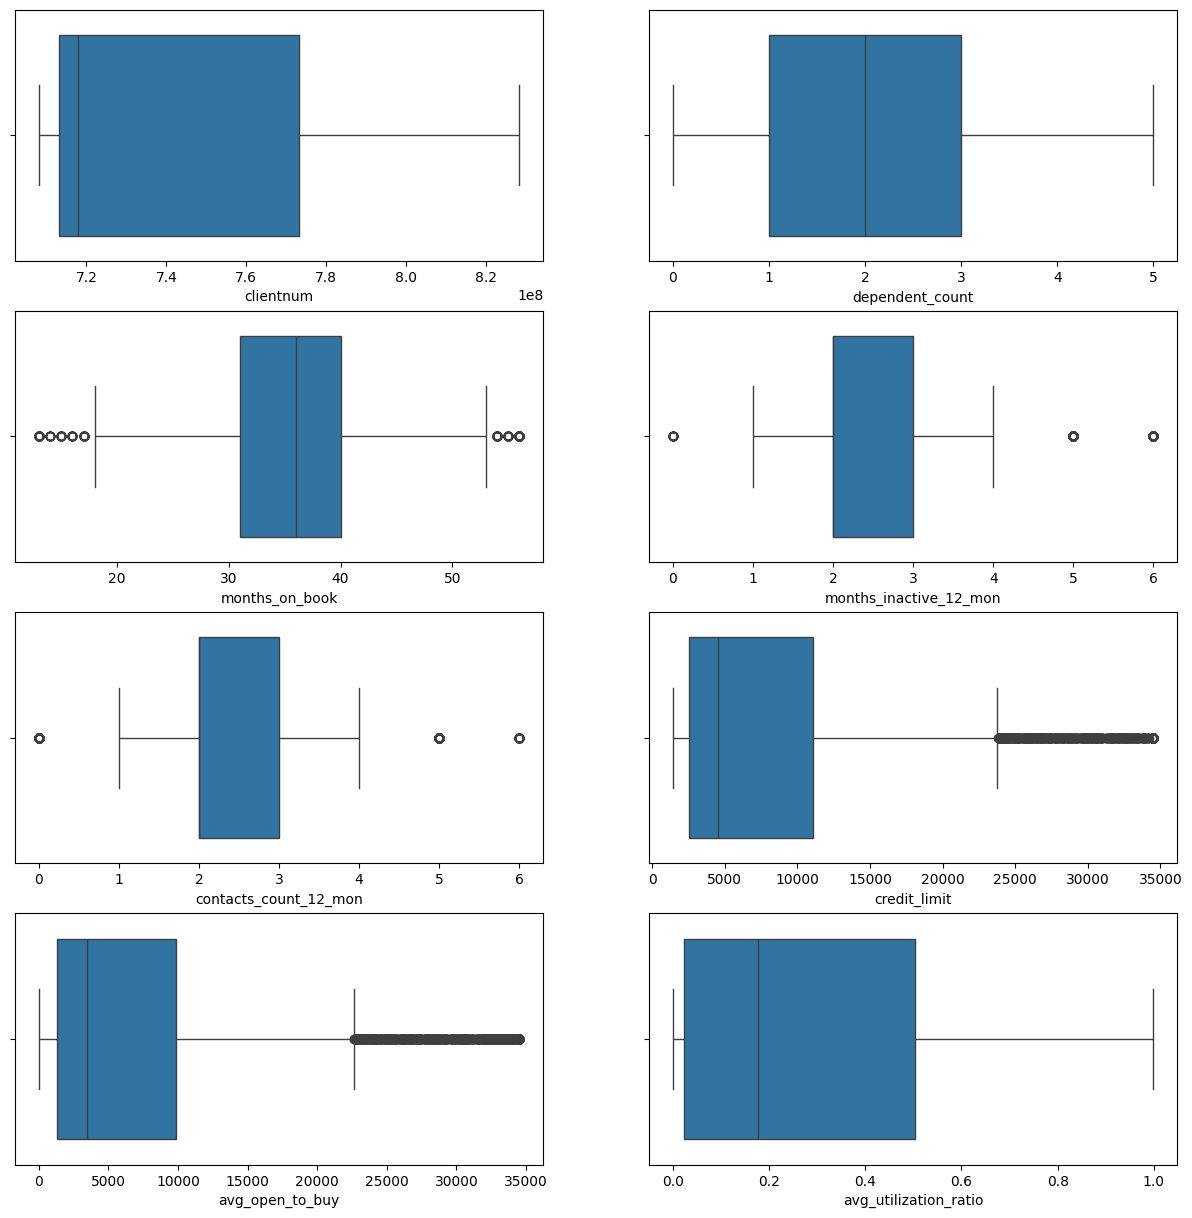

In [13]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
axs = axs.flatten()

# Iterate through the list for numerical variables and create box-whisker plots of data in each numerical variable
for i, var in enumerate(numeric_col):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=df1, ax=axs[i])

fig.tight_layout
plt.show();

In [14]:
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in df1.columns:
    if df1[column_name].dtype == 'object':
        print(f" - The '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = df1[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])

        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())

        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f" - There are no outliers in the '{column_name}' column. \n")

        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)

            # If not, print message below
            else:
                print(f" - The potential ouliers in the '{column_name}' column are:\n{list_of_outliers} \nAnd the respective rows with the potential outlier are:\n{rows_with_outliers}.")

# Print message to explain next steps to validate outliers
print(f" - Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")

 - There are no outliers in the 'clientnum' column. 

 - The 'attrition_flag' column is not a numerical column 

 - There are no outliers in the 'dependent_count' column. 

 - The 'card_category' column is not a numerical column 

 - There are no outliers in the 'avg_utilization_ratio' column. 

 - Detected too many potential outliers in the following columns: ['months_on_book', 'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit', 'avg_open_to_buy']. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.



### Observation:
Using the general rule for detecting potential outliers—where any data point greater than Q3 + (1.5 × IQR) or less than Q1 – (1.5 × IQR) is considered an outlier—I will calculate the lower and upper bounds of the interquartile range (IQR) for each column. These thresholds will then be compared against the minimum and maximum values in the dataset to determine whether they can be considered true outliers, taking into account the definition and context of each variable.

In [15]:
# Printing the Lower and upper interquartile ranges for all the columns in the dataset.
variables = pd.DataFrame(columns=['Variable','Lower Limit','Upper Limit'])

nan_columns = []
for i, var in enumerate(df1.columns):
    if var == 'clientnum':
        iqr_lower = np.nan
        iqr_upper = np.nan
        nan_columns.append(var)

    elif df1[var].dtype == 'object':
        iqr_lower = np.nan
        iqr_upper = np.nan
        nan_columns.append(var)

    else:
        df = df1[var]
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr

    variables.loc[i] = [var, iqr_lower, iqr_upper]

print(f"\nFor the following variables with null values: {nan_columns}, clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values \n")

variables


For the following variables with null values: ['clientnum', 'attrition_flag', 'card_category'], clientnum is not applicable as it is only a unique id number for each client in the dataset. The others are of string/object datatypes. Hence the null values 



,Variable,Lower Limit,Upper Limit
0,clientnum,NaN,NaN
1,attrition_flag,NaN,NaN
2,dependent_count,-2.000,6.000
3,card_category,NaN,NaN
4,months_on_book,17.500,53.500
5,months_inactive_12_mon,0.500,4.500
6,contacts_count_12_mon,0.500,4.500
7,credit_limit,-10213.750,23836.250
8,avg_open_to_buy,-11477.250,22660.750
9,avg_utilization_ratio,-0.697,1.223


After reading the column/variable definition and comparing the lower and upper Limits for each column to the min & max values, it is safe to assume that the potential outliers that were detected, are actually not outliers

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientnum               10127 non-null  int64  
 1   attrition_flag          10127 non-null  object 
 2   dependent_count         10127 non-null  int64  
 3   card_category           10127 non-null  object 
 4   months_on_book          10127 non-null  int64  
 5   months_inactive_12_mon  10127 non-null  int64  
 6   contacts_count_12_mon   10127 non-null  int64  
 7   credit_limit            10127 non-null  float64
 8   avg_open_to_buy         10127 non-null  float64
 9   avg_utilization_ratio   10127 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 791.3+ KB


In [17]:
df1.duplicated().sum()

np.int64(0)

In [18]:
df1[df1.duplicated()].sum()

,0
clientnum,0
attrition_flag,0
dependent_count,0
card_category,0
months_on_book,0
months_inactive_12_mon,0
contacts_count_12_mon,0
credit_limit,0.0
avg_open_to_buy,0.0
avg_utilization_ratio,0.0


In [19]:
variables = pd.DataFrame(columns=['column_name','Number of unique values','Values'])

for i, var in enumerate(df1.columns):
    variables.loc[i] = [var, df1[var].nunique(), df1[var].unique().tolist()]

variables

,column_name,Number of unique values,Values
0,clientnum,10127,"[806160108, 804424383, 708300483, 808284783, 7..."
1,attrition_flag,2,"[Existing Customer, Attrited Customer]"
2,dependent_count,6,"[1, 0, 2, 3, 4, 5]"
3,card_category,4,"[Blue, Silver, Gold, Platinum]"
4,months_on_book,44,"[56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 4..."
5,months_inactive_12_mon,7,"[2, 3, 4, 0, 1, 6, 5]"
6,contacts_count_12_mon,7,"[3, 2, 0, 1, 4, 5, 6]"
7,credit_limit,6205,"[3193.0, 10215.0, 7882.0, 1438.3, 13860.0, 300..."
8,avg_open_to_buy,6813,"[676.0, 9205.0, 7277.0, 1438.3, 12208.0, 489.0..."
9,avg_utilization_ratio,964,"[0.788, 0.099, 0.077, 0.0, 0.119, 0.837, 0.679..."


In [20]:
df1.describe()

,clientnum,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,2.346203,35.928409,2.341167,2.455317,8631.953698,7469.139637,0.274894
std,3.690378e+07,1.298908,7.986416,1.010622,1.106225,9088.776650,9090.685324,0.275691
min,7.080821e+08,0.000000,13.000000,0.000000,0.000000,1438.300000,3.000000,0.000000
25%,7.130368e+08,1.000000,31.000000,2.000000,2.000000,2555.000000,1324.500000,0.023000
50%,7.179264e+08,2.000000,36.000000,2.000000,2.000000,4549.000000,3474.000000,0.176000
75%,7.731435e+08,3.000000,40.000000,3.000000,3.000000,11067.500000,9859.000000,0.503000
max,8.283431e+08,5.000000,56.000000,6.000000,6.000000,34516.000000,34516.000000,0.999000


In [21]:
df1.isnull().sum()

,0
clientnum,0
attrition_flag,0
dependent_count,0
card_category,0
months_on_book,0
months_inactive_12_mon,0
contacts_count_12_mon,0
credit_limit,0
avg_open_to_buy,0
avg_utilization_ratio,0


## basic_client_info dataset

In [22]:
df2.describe()

,clientnum,customer_age
count,1.012700e+04,10127.000000
mean,7.391776e+08,46.325960
std,3.690378e+07,8.016814
min,7.080821e+08,26.000000
25%,7.130368e+08,41.000000
50%,7.179264e+08,46.000000
75%,7.731435e+08,52.000000
max,8.283431e+08,73.000000


In [23]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
categorical_col = []
numeric_col = []

# column of 'object' datatype is categorical column.
for column_name in df2.columns:
    if df2[column_name].dtype == 'object':
        categorical_col.append(column_name)
    else:
        numeric_col.append(column_name)

In [24]:
categorical_col

['gender', 'education_level', 'marital_status', 'income_category']

In [25]:
numeric_col

['clientnum', 'customer_age']

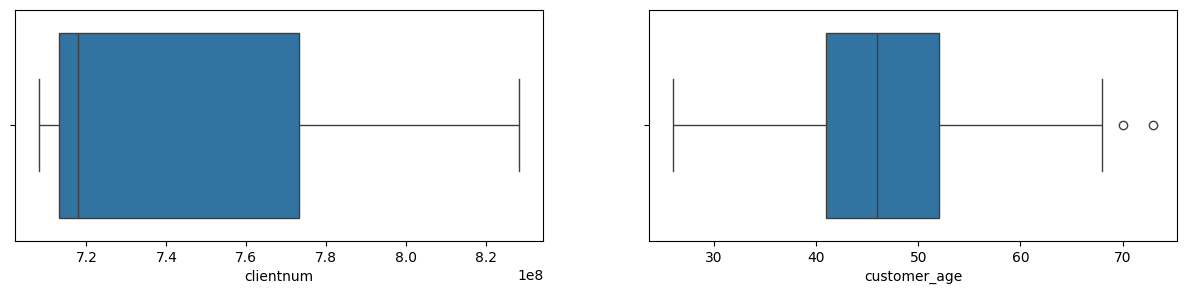

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,3))
axs = axs.flatten()

# Iterate through the list for numerical variables and create box-whisker plots of data in each numerical variable
for i, var in enumerate(numeric_col):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=df2, ax=axs[i])

fig.tight_layout
plt.show();

In [27]:
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in df2.columns:
    if df2[column_name].dtype == 'object':
        print(f" - The '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = df2[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])

        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())

        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f" - There are no outliers in the '{column_name}' column. \n")

        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)

            # If not, print message below
            else:
                print(f" - The potential ouliers in the '{column_name}' column are:{list_of_outliers} \nAnd the respective rows with the potential outlier are:{rows_with_outliers}.\n")

# Print message to explain next steps to validate outliers
print(f" - Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")

 - There are no outliers in the 'clientnum' column. 

 - The potential ouliers in the 'customer_age' column are:[np.int64(73), np.int64(70)] 
And the respective rows with the potential outlier are:[4115, 8317].

 - The 'gender' column is not a numerical column 

 - The 'education_level' column is not a numerical column 

 - The 'marital_status' column is not a numerical column 

 - The 'income_category' column is not a numerical column 

 - Detected too many potential outliers in the following columns: []. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.



**Observation:**

Detected 73 and 70 in the 'customer_age' column as potential outliers. After consulting with the data definition for that variable and comparing these potential outliers to the Q1 & Q3 values from the basic statistics above, my suggestion would be to keep these rows but exclude them when asking questions such as the average or mean age of clients of the bank.

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   clientnum        10127 non-null  int64 
 1   customer_age     10127 non-null  int64 
 2   gender           10127 non-null  object
 3   education_level  10127 non-null  object
 4   marital_status   10127 non-null  object
 5   income_category  10127 non-null  object
dtypes: int64(2), object(4)
memory usage: 474.8+ KB


In [29]:
df2.isnull().sum()

,0
clientnum,0
customer_age,0
gender,0
education_level,0
marital_status,0
income_category,0


In [30]:
df2.duplicated().sum()

np.int64(0)

In [31]:
df2[df2.duplicated()].sum()

,0
clientnum,0
customer_age,0
gender,0
education_level,0
marital_status,0
income_category,0


In [32]:
variables = pd.DataFrame(columns=['column_name','No of unique values','Values'])

for i, var in enumerate(df2.columns):
    variables.loc[i] = [var, df2[var].nunique(), df2[var].unique().tolist()]

variables

,column_name,No of unique values,Values
0,clientnum,10127,"[708082083, 708083283, 708084558, 708085458, 7..."
1,customer_age,45,"[45, 58, 46, 34, 49, 43, 32, 37, 55, 52, 47, 5..."
2,gender,2,"[F, M]"
3,education_level,7,"[High School, Unknown, Doctorate, Uneducated, ..."
4,marital_status,4,"[Married, Single, Divorced, Unknown]"
5,income_category,6,"[Less than $40K, $40K - $60K, $80K - $120K, Un..."


Observation:


- Similar to the previous dataset, only the clientnum column has unique values across all 10,127 rows. This is expected since the variable represents client IDs, which are unique identifiers for each client.
- The basic_client_info_df dataset contains demographic details of the bank’s clients, making it an essential resource for understanding client behavior and identifying trends across different customer segments.

## enriched churn dataset

In [33]:
df3.describe()

,clientnum,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,3.812580,1162.814061,0.759941,4404.086304,0.712222,64.858695
std,3.690378e+07,1.554408,814.987335,0.219207,3397.129254,0.238086,23.472570
min,7.080821e+08,1.000000,0.000000,0.000000,510.000000,0.000000,10.000000
25%,7.130368e+08,3.000000,359.000000,0.631000,2155.500000,0.582000,45.000000
50%,7.179264e+08,4.000000,1276.000000,0.736000,3899.000000,0.702000,67.000000
75%,7.731435e+08,5.000000,1784.000000,0.859000,4741.000000,0.818000,81.000000
max,8.283431e+08,6.000000,2517.000000,3.397000,18484.000000,3.714000,139.000000


In [34]:
# Create two empty lists, one to store names of categorical variables, and the other for numerical variables
categorical_col = []
numeric_col = []

# column of 'object' datatype is categorical column.
for column_name in df3.columns:
    if df3[column_name].dtype == 'object':
        categorical_col.append(column_name)
    else:
        numeric_col.append(column_name)

In [35]:
numeric_col

['clientnum',
 'total_relationship_count',
 'total_revolving_bal',
 'total_amt_chng_q4_q1',
 'total_trans_amt',
 'total_ct_chng_q4_q1',
 'total_trans_ct']

In [36]:
categorical_col

[]

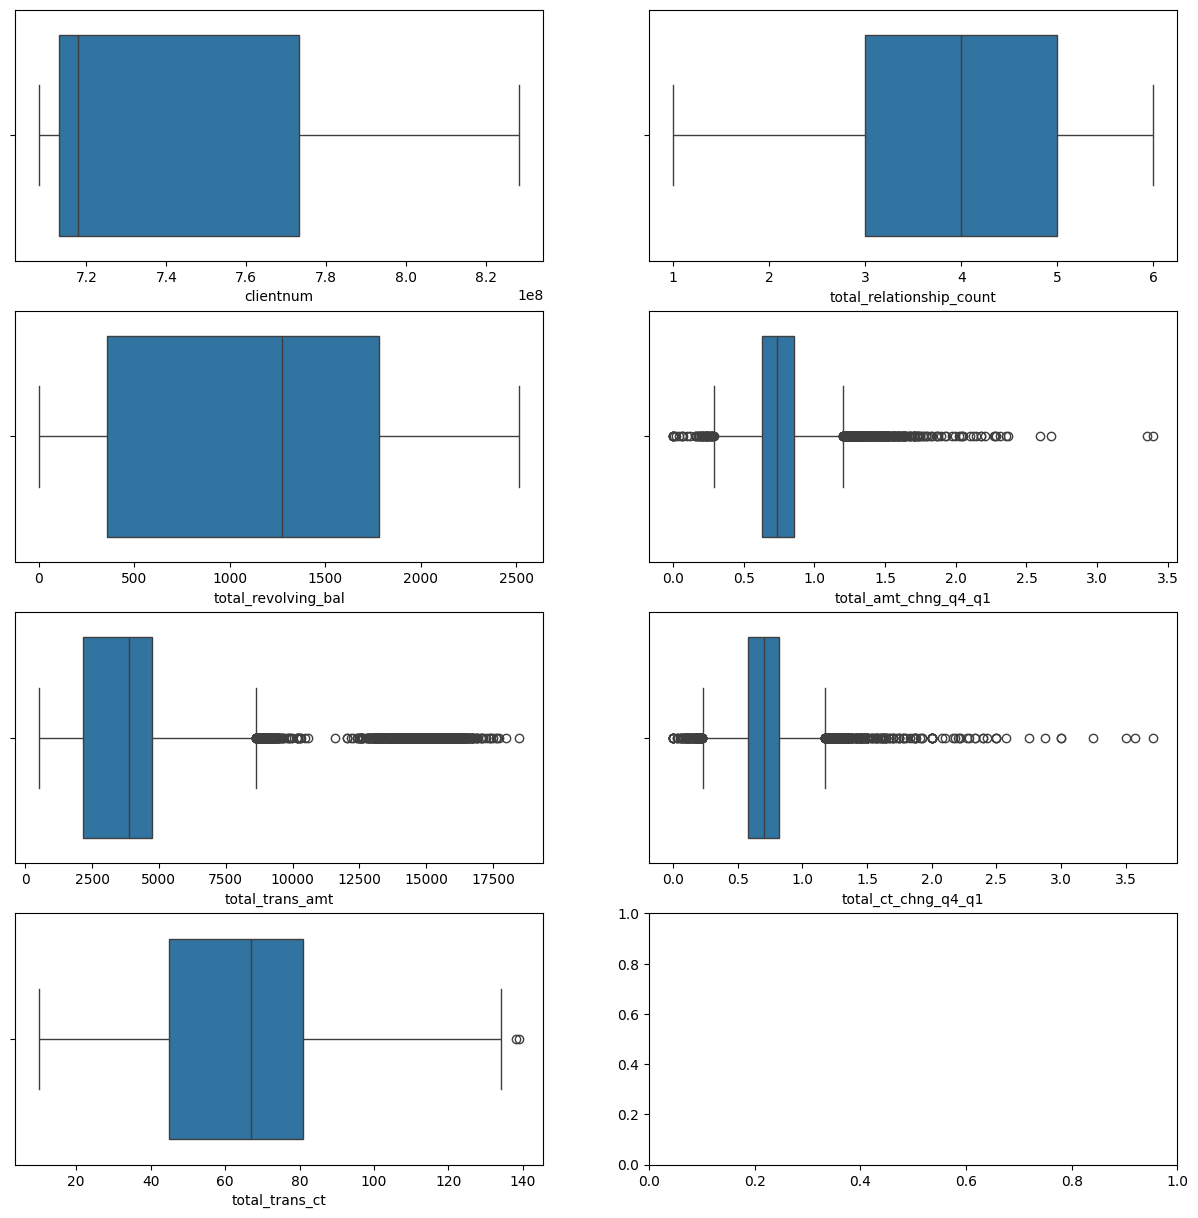

In [37]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,15))
axs = axs.flatten()

# Iterate through the list for numerical variables and create box-whisker plots of data in each numerical variable
for i, var in enumerate(numeric_col):
    # Using Seaborn's box plot for outlier detection
    sns.boxplot(x=var, data=df3, ax=axs[i])

fig.tight_layout
plt.show();

In [38]:
outlier_vars = []

# Iterate through the variables again and provide explanation as to whether or not outliers were detected and next steps
for column_name in df3.columns:
    if df3[column_name].dtype == 'object':
        print(f" - The '{column_name}' column is not a numerical column \n")
    else:
        # Using the general rule for identifying potential outliers which is that if any data point in a dataset is more than
        # Q3 + 1.5xIQR or less than Q1 - 1.5xIQR, it's a high outlier. I would create a custom dictionary to capture potential outliers in each column.
        data = df3[column_name]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        iqr_lower = q1 - 1.5 * iqr
        iqr_upper = q3 + 1.5 * iqr
        outliers = dict(data[(data < iqr_lower) | (data > iqr_upper)])

        list_of_outliers = list(outliers.values())
        rows_with_outliers = list(outliers.keys())

        # If no potential outliers detected, print message below
        if len(list_of_outliers) == 0:
            print(f" - There are no outliers in the '{column_name}' column. \n")

        else:
            # If potential outliers detected were more than 10, add column name to the list of columns with possible outliers
            if len(list_of_outliers) > 10:
                outlier_vars.append(column_name)

            # If not, print message below
            else:
                print(f" - The potential ouliers in the '{column_name}' column are:{list_of_outliers} \nAnd the respective rows with the potential outlier are:{rows_with_outliers}.\n")

# Print message to explain next steps to validate outliers
print(f" - Detected too many potential outliers in the following columns: {outlier_vars}. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.\n")

 - There are no outliers in the 'clientnum' column. 

 - There are no outliers in the 'total_relationship_count' column. 

 - There are no outliers in the 'total_revolving_bal' column. 

 - The potential ouliers in the 'total_trans_ct' column are:[np.int64(138), np.int64(139)] 
And the respective rows with the potential outlier are:[1858, 10089].

 - Detected too many potential outliers in the following columns: ['total_amt_chng_q4_q1', 'total_trans_amt', 'total_ct_chng_q4_q1']. Based on the high number of potential outliers detected, use the column definition and check the summary statistics (min & max values) above to find out if there are truly outliers in these columns.



Observation:

Detected 138 and 139 in the 'total_trans_ct' column as potential outliers. After consulting with the data definition for that variable, 'total_trans_ct' represents the total transaction count a client made in the last 12 months. This data would be useful to identify active clients that may be interested in using other bank products and services, hence my suggestion would be to keep them.

In [39]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   total_relationship_count  10127 non-null  int64  
 2   total_revolving_bal       10127 non-null  int64  
 3   total_amt_chng_q4_q1      10127 non-null  float64
 4   total_trans_amt           10127 non-null  int64  
 5   total_ct_chng_q4_q1       10127 non-null  float64
 6   total_trans_ct            10127 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 553.9 KB


In [40]:
df3.isnull().sum()

,0
clientnum,0
total_relationship_count,0
total_revolving_bal,0
total_amt_chng_q4_q1,0
total_trans_amt,0
total_ct_chng_q4_q1,0
total_trans_ct,0


In [41]:
df3.duplicated().sum()

np.int64(0)

In [42]:
df3[df3.duplicated()].sum()

,0
clientnum,0.0
total_relationship_count,0.0
total_revolving_bal,0.0
total_amt_chng_q4_q1,0.0
total_trans_amt,0.0
total_ct_chng_q4_q1,0.0
total_trans_ct,0.0


In [43]:
variables = pd.DataFrame(columns=['column_name','No of unique values','Values'])

for i, var in enumerate(df3.columns):
    variables.loc[i] = [var, df3[var].nunique(), df3[var].unique().tolist()]

variables

,column_name,No of unique values,Values
0,clientnum,10127,"[828343083, 828298908, 828294933, 828291858, 8..."
1,total_relationship_count,6,"[3, 4, 6, 5, 1, 2]"
2,total_revolving_bal,1974,"[1793, 2035, 2437, 1821, 659, 765, 848, 1387, ..."
3,total_amt_chng_q4_q1,1158,"[0.803, 0.613, 0.765, 0.63, 0.938, 0.644, 0.76..."
4,total_trans_amt,5033,"[3646, 1770, 2519, 2381, 3756, 4053, 1408, 426..."
5,total_ct_chng_q4_q1,830,"[0.659, 0.741, 0.565, 0.481, 0.842, 0.692, 1.0..."
6,total_trans_ct,126,"[68, 47, 36, 40, 70, 66, 23, 92, 84, 33, 39, 4..."


**Observation:**


As with the previous dataset, only the clientnum column contains unique values across all 10,127 rows, which is expected since it represents the client ID/number unique to each customer.

The enriched_churn dataset provides detailed information on clients’ credit card usage, including total revolving balance, total transaction amounts, and the number of transactions over the last 12 months. These variables are valuable for understanding client spending and repayment behaviors and will be critical for deeper analysis to identify the key drivers behind client churn and attrition from the bank’s credit card services.

# Data Cleaning

For the summary statistics analysis, I used Pandas DataFrame methods to assess dataset properties. Specifically, df.info() provided structural details, df.describe() generated descriptive statistics, and df.value_counts() was applied to count unique values. Outlier detection was performed, and the identified values were validated to confirm whether they were true outliers.

One key step involved converting the clientnum variable from an integer datatype to a string/object datatype. Although storing unique IDs as integers is considered best practice in SQL databases (for efficiency and performance reasons), I converted it to string format for analytical purposes—such as cross-correlation analysis, descriptive statistics, and answering data-related questions.

My approach to data cleaning began with making a copy of each dataset to ensure that the original data remained intact. I then applied the define–code–test framework, which involves:

- Defining cleaning steps using clear action verbs,

- Coding the cleaning operations, and

- Testing programmatically to confirm that the desired results were achieved.

In [44]:
df = df1.merge(df2, on='clientnum').merge(df3, on='clientnum')
df.head()

,clientnum,attrition_flag,dependent_count,card_category,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,...,gender,education_level,marital_status,income_category,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
0,806160108,Existing Customer,1,Blue,56,2,3,3193.0,676.0,0.788,...,M,High School,Married,$40K - $60K,2,2517,1.831,1336,1.143,30
1,804424383,Existing Customer,1,Blue,56,3,2,10215.0,9205.0,0.099,...,M,Unknown,Married,$60K - $80K,3,1010,0.843,1904,1.000,40
2,708300483,Attrited Customer,0,Blue,56,4,3,7882.0,7277.0,0.077,...,F,Doctorate,Married,Unknown,5,605,1.052,704,0.143,16
3,808284783,Existing Customer,1,Blue,56,0,0,1438.3,1438.3,0.000,...,F,Unknown,Married,Less than $40K,6,0,0.813,1951,1.095,44
4,712720158,Existing Customer,1,Blue,56,2,3,13860.0,12208.0,0.119,...,M,Graduate,Married,Unknown,5,1652,1.255,1910,1.909,32


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   dependent_count           10127 non-null  int64  
 3   card_category             10127 non-null  object 
 4   months_on_book            10127 non-null  int64  
 5   months_inactive_12_mon    10127 non-null  int64  
 6   contacts_count_12_mon     10127 non-null  int64  
 7   credit_limit              10127 non-null  float64
 8   avg_open_to_buy           10127 non-null  float64
 9   avg_utilization_ratio     10127 non-null  float64
 10  customer_age              10127 non-null  int64  
 11  gender                    10127 non-null  object 
 12  education_level           10127 non-null  object 
 13  marital_status            10127 non-null  object 
 14  income

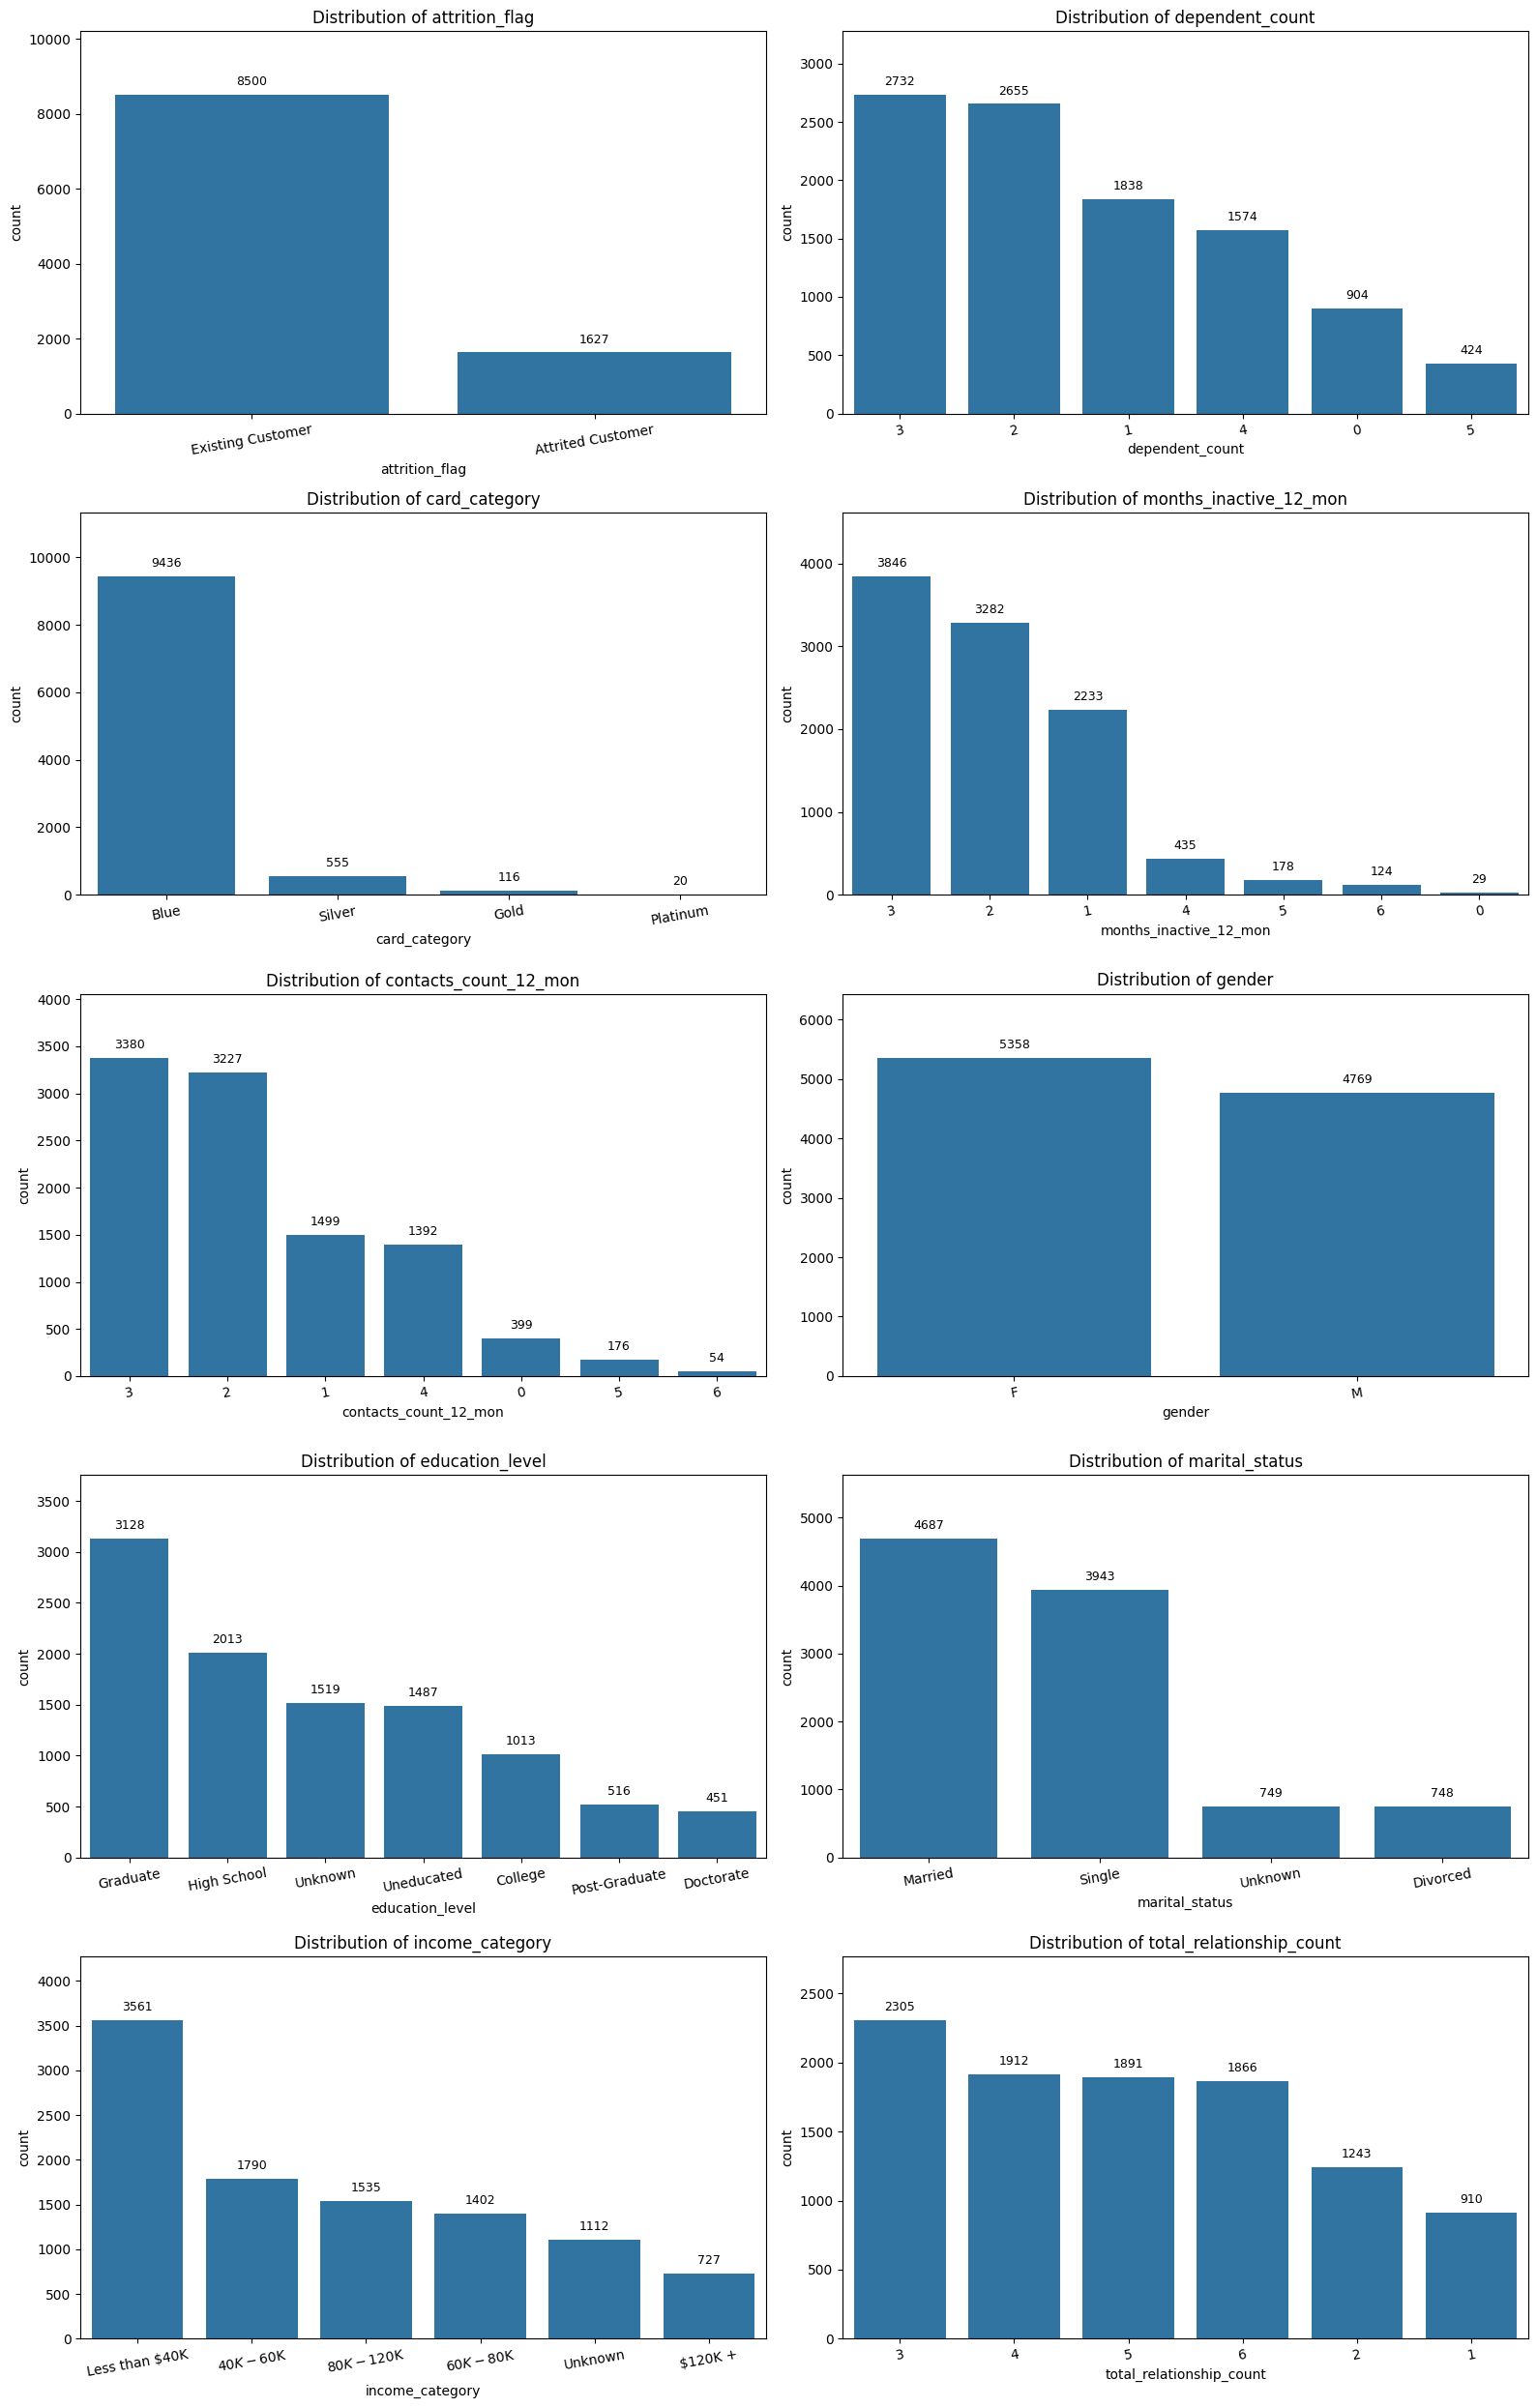

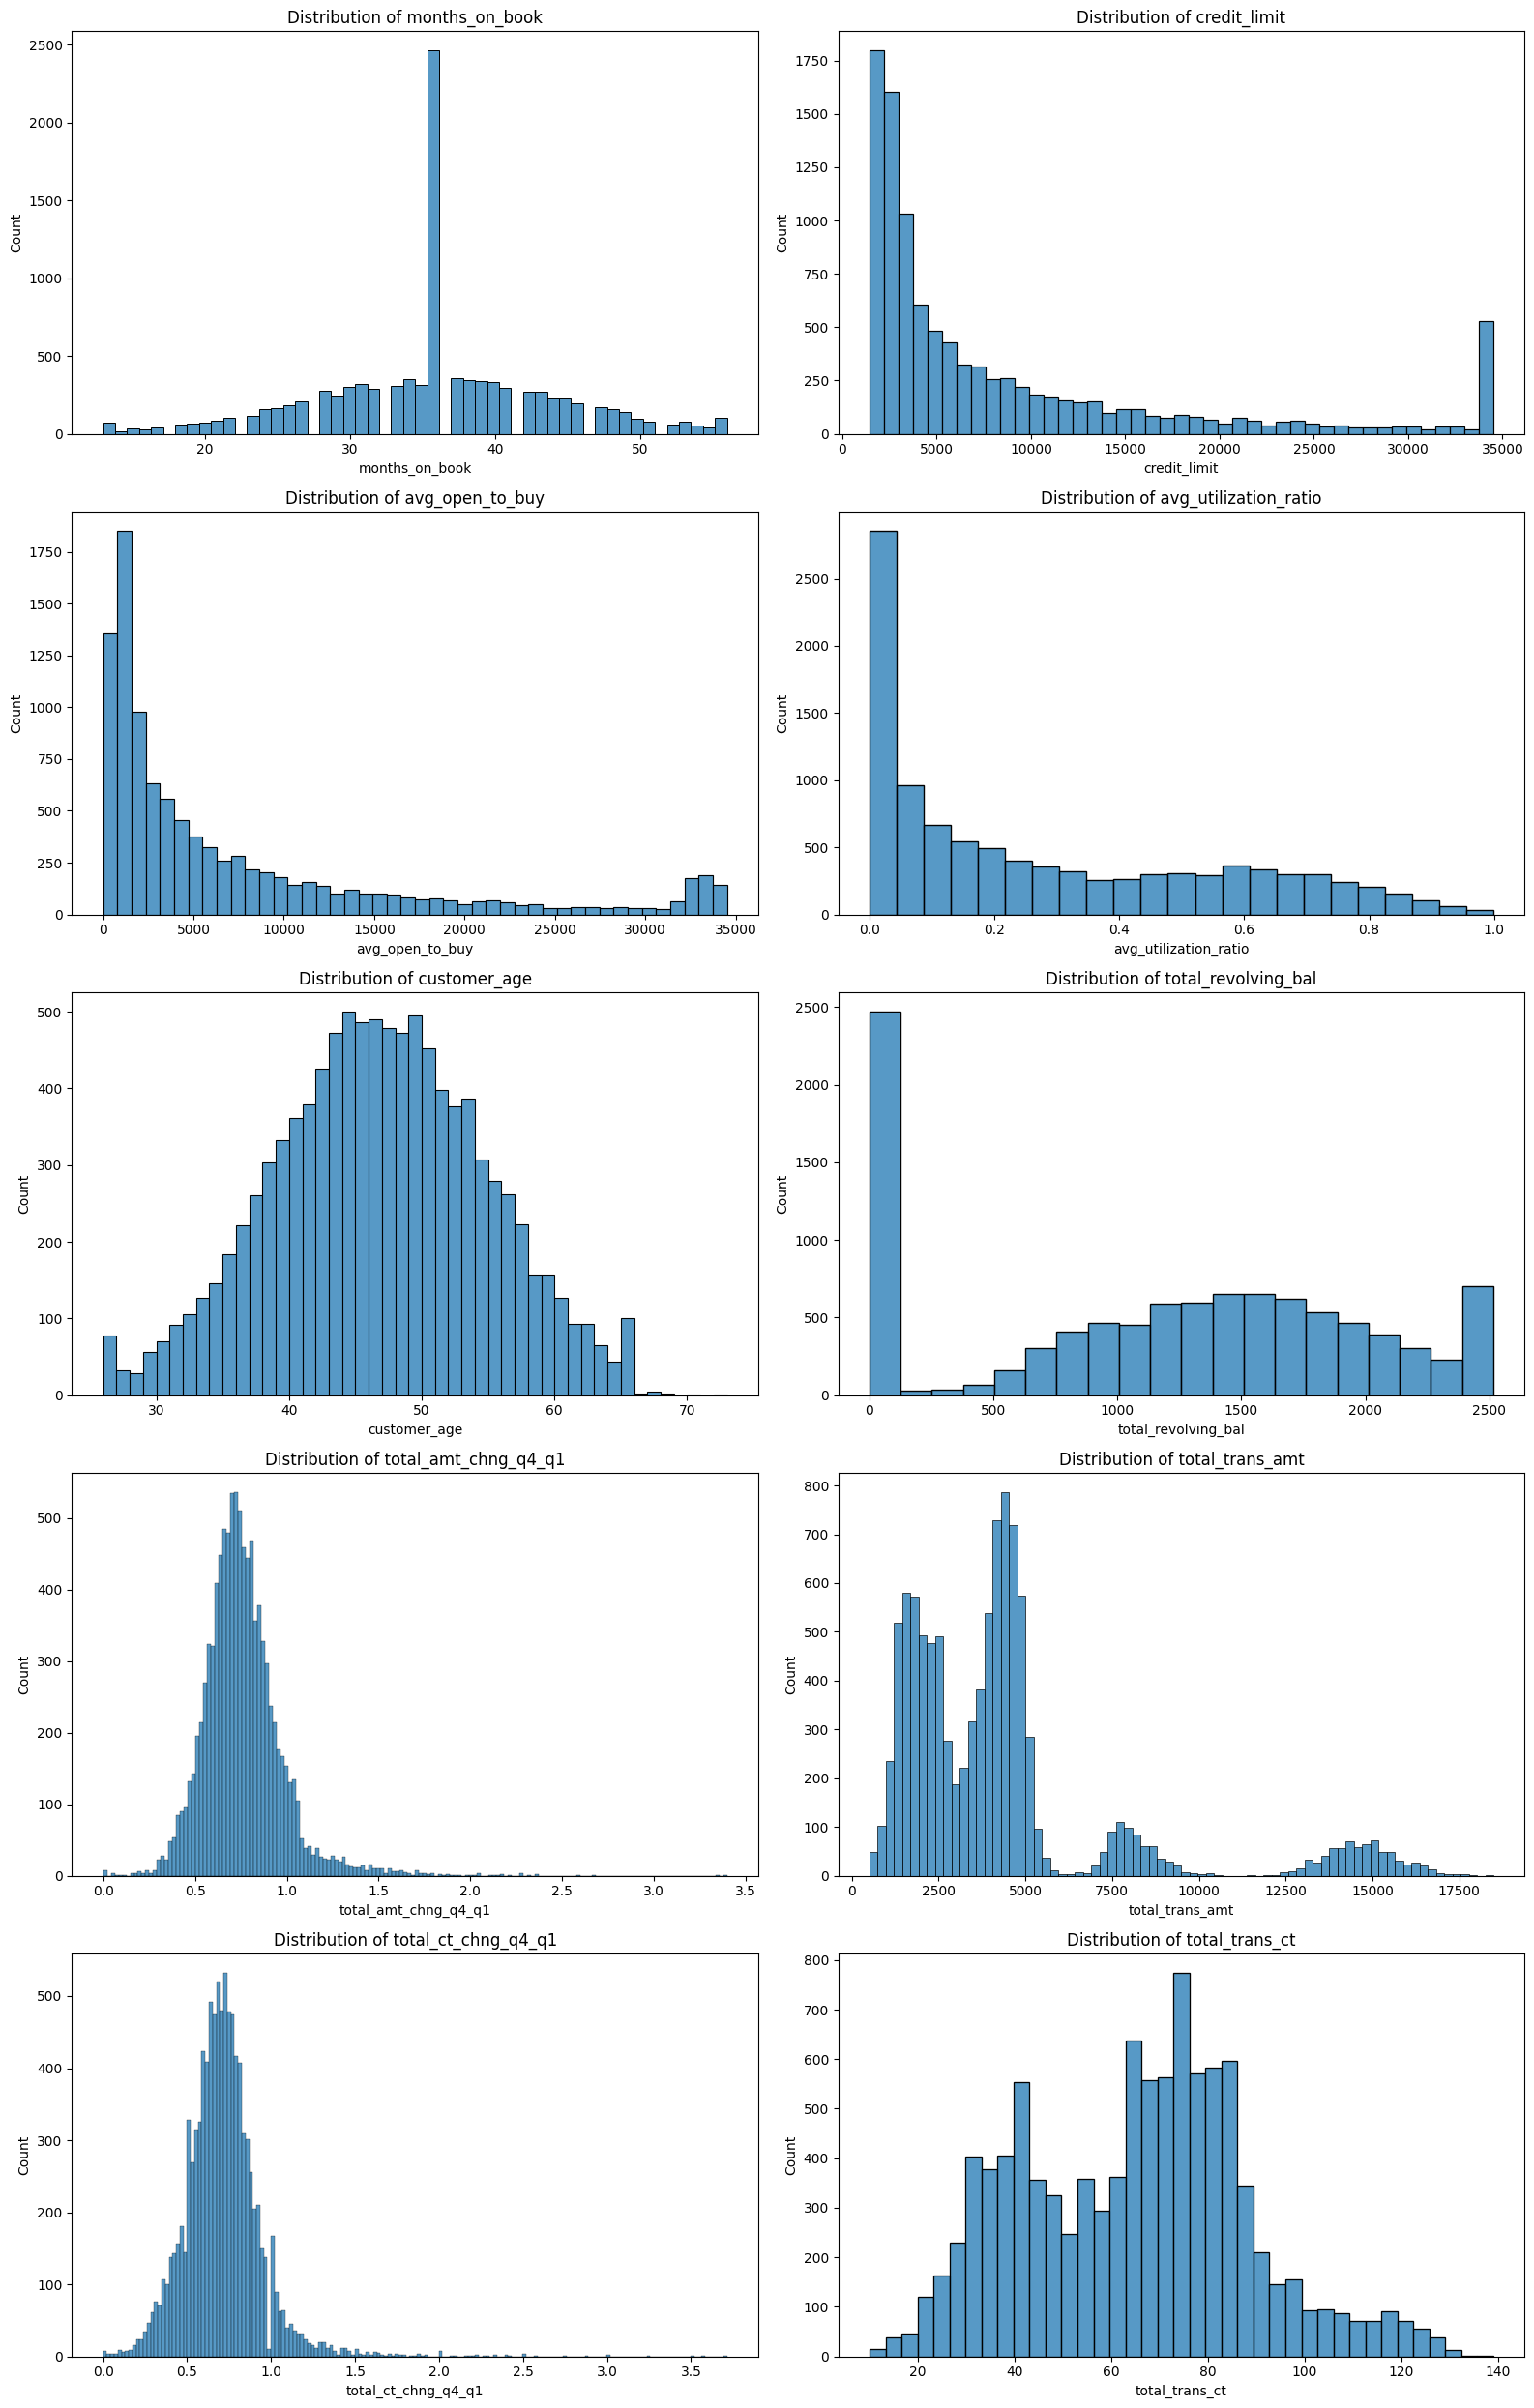


Descriptive Statistics for numerical columns:

       months_on_book  credit_limit  avg_open_to_buy  avg_utilization_ratio  \
count    10127.000000  10127.000000     10127.000000           10127.000000   
mean        35.928409   8631.953698      7469.139637               0.274894   
std          7.986416   9088.776650      9090.685324               0.275691   
min         13.000000   1438.300000         3.000000               0.000000   
25%         31.000000   2555.000000      1324.500000               0.023000   
50%         36.000000   4549.000000      3474.000000               0.176000   
75%         40.000000  11067.500000      9859.000000               0.503000   
max         56.000000  34516.000000     34516.000000               0.999000   

       customer_age  total_revolving_bal  total_amt_chng_q4_q1  \
count  10127.000000         10127.000000          10127.000000   
mean      46.325960          1162.814061              0.759941   
std        8.016814           814.987335  

In [46]:
def plot_variable_distributions(df):
    column_list = []
    unique_val_vars = []
    non_unique_vars = []

    # Separate categorical and numerical columns based on unique values
    for column_name in df.columns:
        unique_count = df[column_name].nunique()
        if unique_count < 10:
            unique_val_vars.append(column_name)
        else:
            non_unique_vars.append(column_name)

    plot_color = sns.color_palette()[0]

    # -------------------
    # Plot categorical variables
    # -------------------
    if unique_val_vars:
        fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16,25))
        axs = axs.flatten() if len(unique_val_vars) > 1 else [axs]

        for i, var in enumerate(unique_val_vars):
            sorted_order = df[var].value_counts().index
            plot = sns.countplot(x=var, data=df, ax=axs[i], order=sorted_order, color=plot_color)

            # Rotate labels safely
            axs[i].tick_params(axis='x', rotation=10)
            axs[i].set_title(f"Distribution of {var}", fontsize=12)

            # Add count labels
            for p in plot.patches:
                plot.annotate(f'{int(p.get_height())}',
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='bottom', fontsize=9, color='black',
                              xytext=(0, 5), textcoords='offset points')

            axs[i].set_ylim(0, df[var].value_counts().max() * 1.2)

        plt.tight_layout()
        plt.show()

    # -------------------
    # Plot numerical variables
    # -------------------
    filtered_non_unique_vars = [var for var in non_unique_vars if var != 'clientnum']
    column_list.extend(filtered_non_unique_vars)

    if filtered_non_unique_vars:
        num_vars = len(filtered_non_unique_vars)
        num_cols = 2
        num_rows = (num_vars + 1) // num_cols

        fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16,25))
        axs = axs.flatten()

        for i, var in enumerate(filtered_non_unique_vars):
            sns.histplot(df[var], color=plot_color, kde=False, ax=axs[i])
            axs[i].set_title(f"Distribution of {var}", fontsize=12)

        # Remove unused subplots
        for j in range(i + 1, len(axs)):
            fig.delaxes(axs[j])

        plt.tight_layout()
        plt.show()

    # -------------------
    # Descriptive statistics
    # -------------------
    if column_list:
        print("\nDescriptive Statistics for numerical columns:\n")
        print(df[column_list].describe())


# ==========================
# Example usage
# ==========================
plot_variable_distributions(df)


**Observation**

- The attrition_flag column shows two categories, with most customers still active. Most customers have 2–3 dependents, while very few have 5.

- The Blue credit card dominates with 93% of customers, followed by Silver and Gold; Platinum is rare (~0.2%).

- In the last 12 months, most customers were inactive for 3 months or less and contacted the bank only 2–3 times.

- There are slightly more female than male customers. Around 31% are graduates, while very few hold postgraduate or doctorate degrees.

- Most customers earn below 40k, while fewer earn 120k or higher. A majority use 3 bank products, with smaller groups using 1, 4, 5, or 6 products.

- For numerical variables: customers’ tenure ranges from 13 to 56 months (median 36). Ages range from 26 to 73 (median 46). Card utilization ratios vary widely, but the median is 0.18.

In [49]:
numeric_df = df.select_dtypes(include=['number'])   # only numeric cols
numeric_df.drop('clientnum', axis=1, inplace=True)
numeric_df.corr()

,dependent_count,months_on_book,months_inactive_12_mon,contacts_count_12_mon,credit_limit,avg_open_to_buy,avg_utilization_ratio,customer_age,total_relationship_count,total_revolving_bal,total_amt_chng_q4_q1,total_trans_amt,total_ct_chng_q4_q1,total_trans_ct
dependent_count,1.000000,-0.103062,-0.010768,-0.040505,0.068065,0.068291,-0.037135,-0.122254,-0.039076,-0.002688,-0.035439,0.025046,0.011087,0.049912
months_on_book,-0.103062,1.000000,0.074164,-0.010774,0.007507,0.006732,-0.007541,0.788912,-0.009203,0.008623,-0.048959,-0.038591,-0.014072,-0.049819
months_inactive_12_mon,-0.010768,0.074164,1.000000,0.029493,-0.020394,-0.016605,-0.007503,0.054361,-0.003675,-0.042210,-0.032247,-0.036982,-0.038989,-0.042787
contacts_count_12_mon,-0.040505,-0.010774,0.029493,1.000000,0.020817,0.025646,-0.055471,-0.018452,0.055203,-0.053913,-0.024445,-0.112774,-0.094997,-0.152213
credit_limit,0.068065,0.007507,-0.020394,0.020817,1.000000,0.995981,-0.482965,0.002476,-0.071386,0.042493,0.012813,0.171730,-0.002020,0.075927
avg_open_to_buy,0.068291,0.006732,-0.016605,0.025646,0.995981,1.000000,-0.538808,0.001151,-0.072601,-0.047167,0.007595,0.165923,-0.010076,0.070885
avg_utilization_ratio,-0.037135,-0.007541,-0.007503,-0.055471,-0.482965,-0.538808,1.000000,0.007114,0.067663,0.624022,0.035235,-0.083034,0.074143,0.002838
customer_age,-0.122254,0.788912,0.054361,-0.018452,0.002476,0.001151,0.007114,1.000000,-0.010931,0.014780,-0.062042,-0.046446,-0.012143,-0.067097
total_relationship_count,-0.039076,-0.009203,-0.003675,0.055203,-0.071386,-0.072601,0.067663,-0.010931,1.000000,0.013726,0.050119,-0.347229,0.040831,-0.241891
total_revolving_bal,-0.002688,0.008623,-0.042210,-0.053913,0.042493,-0.047167,0.624022,0.014780,0.013726,1.000000,0.058174,0.064370,0.089861,0.056060


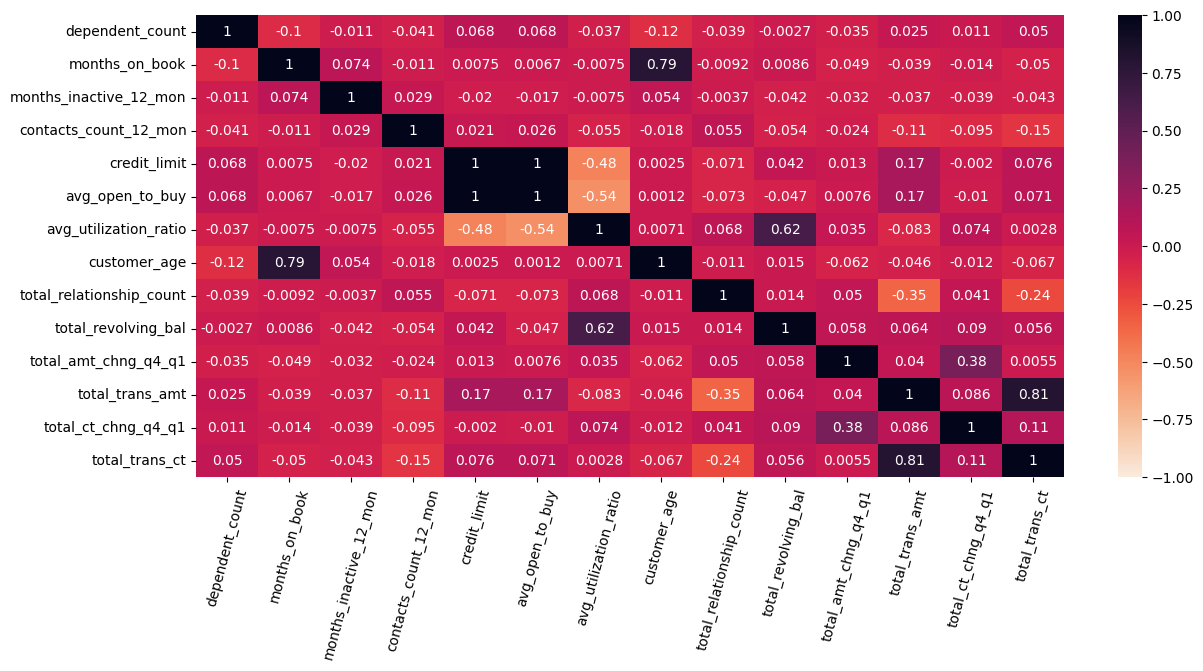

In [50]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True,cmap="rocket_r")

plt.xticks(rotation=75)
plt.show()

The correlation heatmap raises useful questions for the bank, such as:

- What is the relationship between clients’ age and months on book?

- How do credit limit or average open-to-buy relate to utilization ratio?

- How does transaction amount vary with the number of products used?

To explore these, scatter plots can be used for numerical variables (e.g., transaction count vs. transaction amount, utilization ratio vs. revolving balance). For numerical vs. categorical comparisons (e.g., months_on_book, contacts_count, utilization ratio vs. attrition_flag, gender, education_level, income_category), bar charts or pie/tree maps are suitable.

## Raising Data Questions

After analyzing distributions and correlations, I can now frame key questions to better understand customer behavior and reasons for churn. Grouping by attrition flag and demographic columns with numerical features can reveal insights into credit card usage and repayment patterns.

Some possible questions include:

- How does total relationship count vary across demographics (age,
gender, income)?

- What is the average number of products per customer, and who are the top/bottom users?

- Which credit card category is most popular, and how does attrition differ by category?

- Does dependent count affect credit usage or credit limits?

- Who are the top/bottom clients by % change in transaction count/amount, and how does churn compare?

From these, I will focus on the most investigative questions that can reveal reasons for churn and guide actionable insights.

**Question 1:**

What type of credit card holders have churned the most? How about Customer Retention?

In [51]:
result1 = df.groupby('card_category')['clientnum'].count().reset_index(name='total_customer_count')
result2 = df.groupby('card_category')['attrition_flag'].apply(lambda x: (x == 'Attrited Customer').sum()).reset_index(name='churned_count')

text_table = result1.merge(result2, on='card_category')

text_table['overall_churn_rate_pct'] = np.round(text_table['churned_count'] / len(df) * 100, 2)
text_table['category_churn_rate_pct'] = np.round(text_table['churned_count'] / text_table['total_customer_count'] * 100, 1)
text_table['category_retention_ratio'] = np.round(text_table['total_customer_count'] / text_table['churned_count'], 1)

text_table.sort_values(by='overall_churn_rate_pct', ascending=False)

,card_category,total_customer_count,churned_count,overall_churn_rate_pct,category_churn_rate_pct,category_retention_ratio
0,Blue,9436,1519,15.00,16.1,6.2
3,Silver,555,82,0.81,14.8,6.8
1,Gold,116,21,0.21,18.1,5.5
2,Platinum,20,5,0.05,25.0,4.0


**Explanation**

The churn analysis shows that Blue credit card holders churn the most (15%), while Silver, Gold, and Platinum card holders have churn rates below 1%, which is well under the typical 5–8% range. However, looking deeper, retention patterns shift:

- Platinum → 1 in 4 churned (20 total holders, 4 left)

- Gold → 1 in 5 churned

- Blue → 1 in 6 churned

- Silver → 1 in 7 churned

This highlights a potential retention issue among Platinum customers, despite their small base size. Further investigation is needed to see if income category or other factors explain these differences.

**Question 2:**

Is there a relationship between credit card category, income category and the usage of credit cards by customers?

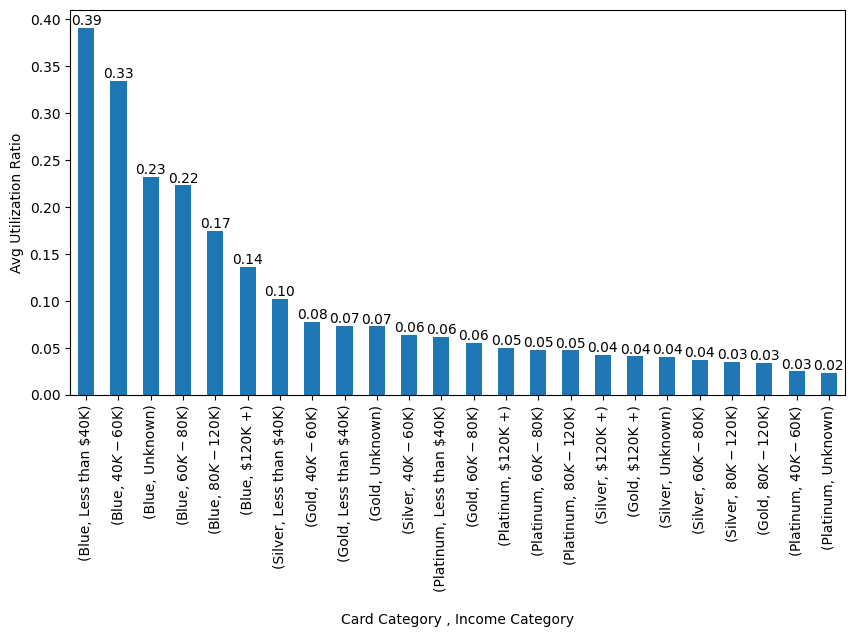

In [52]:
# Grouping by card category & income category to see card utilization trends
view = df.groupby(['card_category', 'income_category'])['avg_utilization_ratio'].mean().sort_values(ascending=False)

# Using a suitable figure/chart size for the plot
plt.figure(figsize = [10, 5])
ax = view.plot(kind='bar', xlabel="\nCard Category , Income Category" , ylabel= "Avg Utilization Ratio", legend=False)

ax.bar_label(ax.containers[0], fmt='%.2f', label_type= 'edge')

plt.show();

**Explanation**

The plot shows that Blue credit card customers earning below 40k or 40k – 60k use their cards the most, while Platinum customers in the 40k – 60k or unknown income categories use them the least.

Across all income groups, Blue card holders consistently use their cards more than Silver, Gold, or Platinum holders. Among higher-income customers (> 60k), usage across Silver, Gold, and Platinum is similar, suggesting lower dependence on credit cards and possibly less interest in other credit products.

Further analysis is needed to see how factors like dependent count influence credit card needs.

**Question 3:**

How does income category & number of dependents per customer affect their credit card needs or usage?

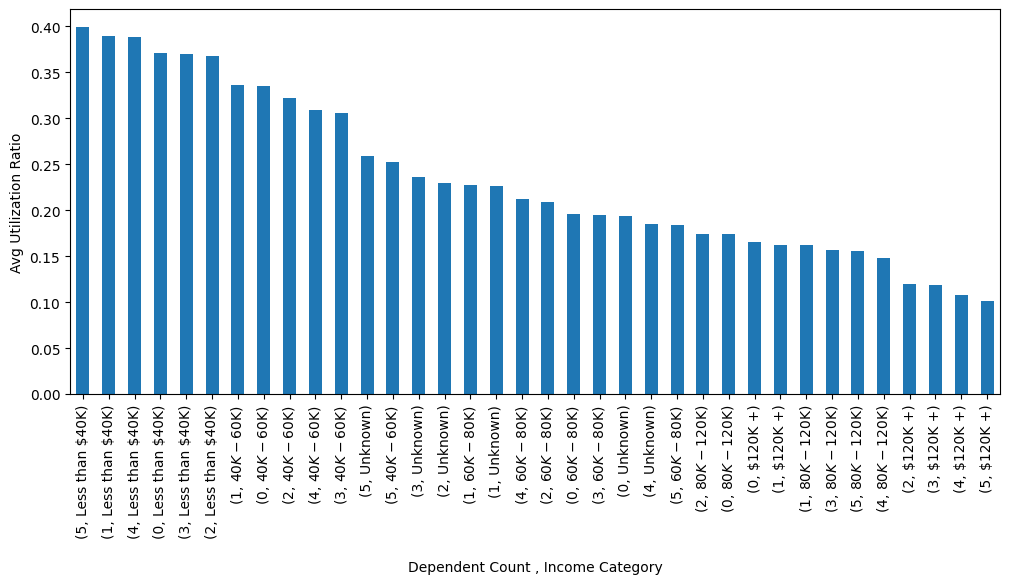

In [53]:
# Grouping by dependent count & income category to see card utilization trends
view = df.groupby(['dependent_count', 'income_category'])['avg_utilization_ratio'].mean().sort_values(ascending=False)

# Using a suitable figure/chart size for the plot
plt.figure(figsize = [12, 5])
ax = view.plot(kind='bar', xlabel="\nDependent Count , Income Category" , ylabel= "Avg Utilization Ratio", legend=False)

#ax.bar_label(ax.containers[0], fmt='%.2f', label_type= 'edge')

plt.show();

**Explanation**


There is no clear correlation between credit card utilization and number of dependants, but when income category is grouped with dependent count, some ineteresting insights can be obtained.

We can see that on average, customers who earn less than 40k use their credit cards the most regardless of their number of dependants. Customers who earn between 40k-60k and those who earn between 60k-80k are not significantly different in their card usage rates regardless of their dependent count. But as earnings further increased, we observed a trend where credit card utilization decreased as number of dependants increased, especially for customers earning 120k or higher.

In general, Card Utilization decreased as income increased suggesting that customers who earn higher tend to use their credit cards less.

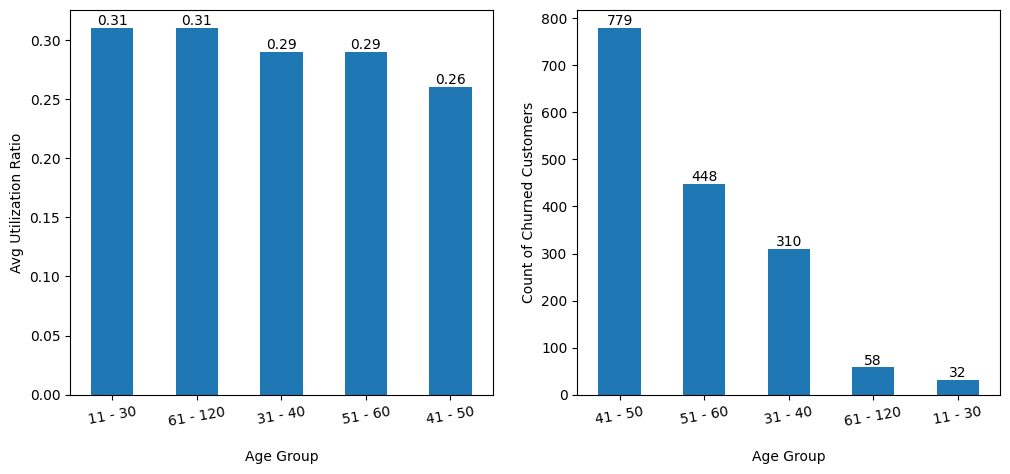

In [56]:
conditions = [
    (df['customer_age'] > 10) & (df['customer_age'] <= 30),
    (df['customer_age'] > 30) & (df['customer_age'] <= 40),
    (df['customer_age'] > 40) & (df['customer_age'] <= 50),
    (df['customer_age'] > 50) & (df['customer_age'] <= 60),
    (df['customer_age'] > 60) & (df['customer_age'] <= 120)
]

values = ['11 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 120']
df['age_group'] = np.select(conditions, values, default="Unknown")

first_view = df.groupby(['age_group'])['avg_utilization_ratio'].apply(lambda x: np.round(x.mean(), 2)).sort_values(ascending=False)
second_view = df.groupby(['age_group'])['attrition_flag'].apply(lambda x: (x == 'Attrited Customer').sum()).sort_values(ascending=False)

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
ax = first_view.plot(kind='bar', xlabel="\nAge Group", ylabel="Avg Utilization Ratio", legend=False)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=10)

plt.subplot(1, 2, 2)
ax = second_view.plot(kind='bar', xlabel="\nAge Group", ylabel="Count of Churned Customers", legend=False)
ax.bar_label(ax.containers[0], label_type='edge')
plt.xticks(rotation=10)

plt.show()


**Solution:**


Here we see that on average, the difference in credit card utilization amongst age groups is not so much; with customers in the 11-30 age group using their credit cards the most while customers in thee 41-50 age groups have the lowest utilization ratio. However, the count of churned customers per age group adds context to this analysis. Now we see that the customers aged between 41 and 50 have churned the most, while customers between 11 and 30 churned the least. From this perspective, a big focus should be made on customers in the 41-50 age group, and more data should be collected to enrich the dataset and provide deeper insights about this group of customers in particular and all age groups in general.